In [1]:
import numpy as np
from scipy import stats #calculate zscore
import time

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train_batch_1 = unpickle("cifar-10-batches-py/data_batch_1")
train_batch_2 = unpickle("cifar-10-batches-py/data_batch_2")
train_batch_3 = unpickle("cifar-10-batches-py/data_batch_3")

train_batch_4 = unpickle("cifar-10-batches-py/data_batch_4")
train_batch_5 = unpickle("cifar-10-batches-py/data_batch_5")
test_batch = unpickle("cifar-10-batches-py/test_batch")



In [193]:
def calcLoss(x, y, w, b, lmbda):
    M = x.shape[0]
    loss = (-1/M)*np.sum( y*np.log(sigmoid(x,w,b)) + (1-y)*np.log(1-sigmoid(x,w,b)) ) + (lmbda/2)*np.sum(w*w)
    return loss

def sigmoid(x, w, b):
    h = 1/(1+np.exp(-(np.sum(w*x, axis=1) + b)))
    h[h == 1.0] = 0.9999 # protect against log(0) when calculating loss
    h[h == 0.0] = 0.0001
    return h.reshape(h.size,1)

def gradLoss(x, y, w, b, lmbda):
    M = x.shape[0]
    grad = np.zeros([1, w.size+1])
    grad[0][:-1] = (-1/M)*np.sum(((y - sigmoid(x,w,b))*x), axis=0) + lmbda*w
    grad[0][-1] = (-1/M)*np.sum(y-sigmoid(x,w,b))
    return grad

def gradFiniteDif(x, y, w, b, lmbda):
    grad_FD = np.zeros([1, w.size+1])
    EPS = 1e-4
    
    for i in range(w.size):
        eVec = np.zeros([1, w.size])
        eVec[0][i] = 1
        grad_FD[0][i] = ((1/(2*EPS))) * (calcLoss(x, y, w + EPS*eVec, b, lmbda) \
                    - calcLoss(x, y, w - EPS*eVec, b, lmbda))
        
    grad_FD[0][-1] = ((1/(2*EPS))) * (calcLoss(x, y, w, b + EPS, lmbda) \
                    - calcLoss(x, y, w, b - EPS, lmbda))
    return grad_FD
   

def FiniteDifferenceGrad(J, params, data):
#computes the gradient using finite differences (Slide 19, Lec 14)
  nParams = params.size 
  fdGrad = np.zeros([nParams,1])

  theta = params.reshape([nParams,1])
  EPSILON = 1e-4 
  for i in np.arange( nParams):
    
    eVec = np.zeros( [nParams,1])
    eVec[i] = 1
    theta_plus  = theta + EPSILON * eVec 
    theta_minus = theta - EPSILON * eVec 
    
    fdGrad[i] = (1/(2*EPSILON)) * (J(theta_plus,data) - J(theta_minus,data))
  return fdGrad

In [3]:
# Create x_train, y_train from train_batch_1
batchsize = 10000

x_train = np.zeros(shape=(batchsize, 3072), dtype = int)
y_train = np.zeros(shape=(batchsize, 1), dtype=int)

x_train[:] = train_batch_1[b'data']
x_train = stats.zscore(x_train, axis = 1) # Normalize data to 0 mean 1 variance per training example

y_train[:] = np.asarray(train_batch_1[b'labels']).reshape(batchsize,1)

target = 0
y_train = (y_train == target)*1 #  target label = 1, all other labels = 0


In [315]:
# Develop classifier for y = 1 for train_batch_1


w = np.random.rand(1,x_train.shape[1])
print('\nw')
print(w)
print(w.shape)

b = np.random.rand(1)[0]
print('\nb')
print(b)

learning_rate = 0.04 # try 0.02, 0.03, or 0.04
print('\nlearning_rate:')
print(learning_rate)

lmbda = 0.1 # try 0, 0.1, 0.01, 1
print('\nlambda:')
print(lmbda)

loss = calcLoss(x_train, y_train, w, b, lmbda)
print('\ninitial loss:')
print(loss)

start = time.time()


MAX_ITER = 5
EPS = 1e-4

    

for i in range(MAX_ITER):

    print('grad:')
    grad = gradLoss(x_train, y_train, w, b, lmbda)
    print(grad)

    if(np.linalg.norm(grad) < EPS): break

    print('\n----\niteration: ', i)

    print('\nexpected new w1:')
    print(w[0][0] - grad[0][0]*learning_rate)
    print('new w:')
    w = w - learning_rate*grad[0][:-1]
    print(w)
    print('new b:')
    b = b - (learning_rate*grad[0][-1])
    print(b)

    print('\nnorm(grad):')
    print(np.linalg.norm(grad))


print('\n\n-------\nFinal params:')
print('w: ', w)
print('b: ', b)
print('loss: ', calcLoss(x_train, y_train, w, b, lmbda))
end = time.time()
print('\n------\nTotal time:')
print(end-start)





w
[[ 0.71682487  0.15077192  0.13386141 ...,  0.4055989   0.54175703
   0.72198356]]
(1, 3072)

b
0.454945844307

learning_rate:
0.04

lambda:
0.1

initial loss:
59.6850629718
grad:
[[ 118.80048166  118.11154403  118.89036682 ...,  102.25384349
   102.93888779    0.9025    ]]

----
iteration:  0

expected new w1:
-4.03519440095
new w:
[[-4.0351944  -4.57368984 -4.62175326 ..., -3.67961103 -3.54839671
  -3.39557196]]
new b:
0.418845844307

norm(grad):
6097.68521649
grad:


/Users/michaelguevarra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


[[-13.65661861 -13.66623582 -13.75195601 ..., -12.45440746 -12.55554663
   -0.0973    ]]

----
iteration:  1

expected new w1:
-3.48892965655
new w:
[[-3.48892966 -4.02704041 -4.07167502 ..., -3.18476505 -3.05022041
  -2.89335009]]
new b:
0.422737844307

norm(grad):
657.864353844
grad:
[[-13.60199214 -13.61157088 -13.69694818 ..., -12.40458983 -12.50532444
   -0.0973    ]]

----
iteration:  2

expected new w1:
-2.94484997112
new w:
[[-2.94484997 -3.48257758 -3.52379709 ..., -2.69189845 -2.55403682
  -2.39313711]]
new b:
0.426629844307

norm(grad):
655.232896487
grad:
[[-13.54758417 -13.5571246  -13.64216039 ..., -12.35497147 -12.45530314
   -0.0973    ]]

----
iteration:  3

expected new w1:
-2.40294660444
new w:
[[-2.4029466  -2.94029259 -2.97811067 ..., -2.20100332 -2.05983796
  -1.89492499]]
new b:
0.430521844307

norm(grad):
652.611964959
grad:
[[-13.49339383 -13.5028961  -13.58759175 ..., -12.30555159 -12.40548193
   -0.0973    ]]

----
iteration:  4

expected new w1:
-1.863210851

In [245]:
# Create x_test, y_test from train_batch_2
batchsize = 10000

x_test = np.zeros(shape=(batchsize, 3072), dtype = int)
y_test = np.zeros(shape=(batchsize, 1), dtype=int)

x_test[:] = train_batch_4[b'data']
x_test = x_test/256 # normalize features from 0-256 to 0-1
y_test[:] = np.asarray(train_batch_4[b'labels']).reshape(batchsize,1)

target = 1
y_test = (y_test == target)*1 #  target label = 1, all other labels = 0

# compare losses
print("training loss: ", calcLoss(x_train, y_train, w, b, lmbda))
print("test loss: ", calcLoss(x_test, y_test, w, b, lmbda))

training loss:  8.726433547730702
test loss:  10.45117615654899


In [318]:
# Create x_train, y_train for train_batch_1
batchsize = 10000

x_train = np.zeros(shape=(batchsize, 3072), dtype = int)
x_train[:] = train_batch_1[b'data'] 
x_train = stats.zscore(x_train, axis = 1) # normalize data to 0 mean 1 variance per training example

w_classes = np.zeros([10,x_train.shape[1]]) # hold all w vectors for each of 10 classifiers
b_classes = np.zeros([10,1]) # hold all bias values for each of 10 classifiers

# Learn weights and bias for each of 10 classifiers
for classNum in range(10):
    target = classNum
    print('\n---\nClassification for label = ', target)
    y_train = np.zeros(shape=(batchsize, 1), dtype=int)
    y_train[:] = np.asarray(train_batch_1[b'labels']).reshape(batchsize,1)
    y_train = (y_train == target)*1 #  target label = 1, all other labels = 0

    w = np.random.randn(1,x_train.shape[1])
    b = np.random.randn(1)[0]
    learning_rate = 0.4 # choose from 0.4 ~ 0.6
    lmbda = 0.1

    loss = calcLoss(x_train, y_train, w, b, lmbda)
    print('\ninitial loss: ', loss)
    
    start = time.time()
    MAX_ITER = 5000
    EPS = 1e-4

    for i in range(MAX_ITER):

        grad = gradLoss(x_train, y_train, w, b, lmbda)
        if(np.linalg.norm(grad) < EPS): break
        w = w - learning_rate*grad[0][:-1]
        b = b - (learning_rate*grad[0][-1])

    print('\n\n-------\nFinal params:')
    print('w: ', w)
    print('b: ', b)
    print('loss: ', calcLoss(x_train, y_train, w, b, lmbda))
    end = time.time()
    print('\n------\nTotal time:')
    print(end-start)
    w_classes[classNum] = w
    b_classes[classNum] = b


---
Classification for label =  0

initial loss:  163.10276508


-------
Final params:
w:  [[ 0.25785164  0.12110794  0.17875827 ...,  0.4452784  -0.33656611
   1.29307737]]
b:  0.2538961385
loss:  106.411445386

------
Total time:
3.8146181106567383

---
Classification for label =  1

initial loss:  163.037121498


-------
Final params:
w:  [[ 0.13198692  0.38188425 -0.62364491 ..., -0.58804187 -0.22937835
   0.28722632]]
b:  -1.44144125991
loss:  108.017581266

------
Total time:
3.9980809688568115

---
Classification for label =  2

initial loss:  166.137506096


-------
Final params:
w:  [[-0.76249803  0.30862165 -0.6888422  ...,  0.58825708 -0.09229776
   0.09551356]]
b:  -0.296188657605
loss:  109.33574257

------
Total time:
3.6400671005249023

---
Classification for label =  3

initial loss:  160.233050312


-------
Final params:
w:  [[-0.12075707  1.07882225 -0.2124263  ...,  0.56213964 -0.10663334
  -0.87439579]]
b:  -0.589778205682
loss:  105.02785928

------
Total time:
3.

In [309]:
# Create test set from test_batch
batchsize = 10000

x_test = np.zeros(shape=(batchsize, 3072), dtype=int) + test_batch[b'data']
x_test = stats.zscore(x_test)
y_test = np.zeros(shape=(batchsize), dtype=int) + np.asarray(test_batch[b'labels'])



airplaine


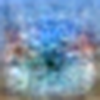

automobile


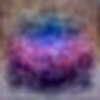

bird


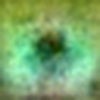

cat


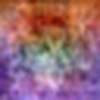

deer


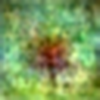

dog


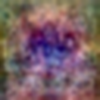

frog


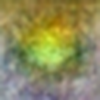

horse


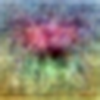

ship


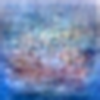

truck


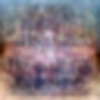

In [280]:
#Visualize weight vector

from PIL import Image
from IPython.display import display

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    img1 = np.asarray(w_classes[i])
    
    img1 = ((img1 - img1.min()) * (1/(img1.max() - img1.min())).astype('uint8'))*255

    
    # splice weights into 3 32x32 matrices for R, G, B channels
    r = np.asarray(img1[:32*32])
    r = r.reshape(32,32)
    g = np.asarray(img1[32*32:32*32*2])
    g = g.reshape(32,32)
    b = np.asarray(img1[32*32*2:])
    b = b.reshape(32,32)

    rgbArray = np.zeros((32,32,3), 'uint8')
    rgbArray[..., 0] = r
    rgbArray[..., 1] = g
    rgbArray[..., 2] = b
    img = Image.fromarray(rgbArray, 'RGB')
    img = img.resize((100,100), Image.ANTIALIAS)
    
    print(labels[i])
    display(img)

In [311]:
# Classify test_set
classifier_10 = np.zeros([10000, 10])
for i in range(10):
    classifier_10[:,i] = sigmoid(x_test, w_classes[i], b_classes[i]).reshape(10000)
y = np.argmax(classifier_10, axis = 1)
y_truth = np.zeros(shape=(batchsize), dtype=int) + np.asarray(test_batch[b'labels'])
cm = np.zeros((10, 10), dtype=int)
np.add.at(cm, [y_truth, y], 1)
np.savetxt("cm.csv", cm, delimiter=",")